# Morphological Transfromation

<a href="https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html">Reference: OpenCV Documentation</a>

In [1]:
import numpy as np
% matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [2]:
import cv2 as cv
img = cv.imread('./data/MODEL.jpg',0)
thresh_img=np.zeros_like(img)
thresh_img[img<200]=0
thresh_img[img>=200]=255

# Erosion

$ε_{B}(X) = \{x|B_x ⊆ X\}$

- Removal of structures of certain shape and size, given by SE (structure element).

<IPython.core.display.Javascript object>


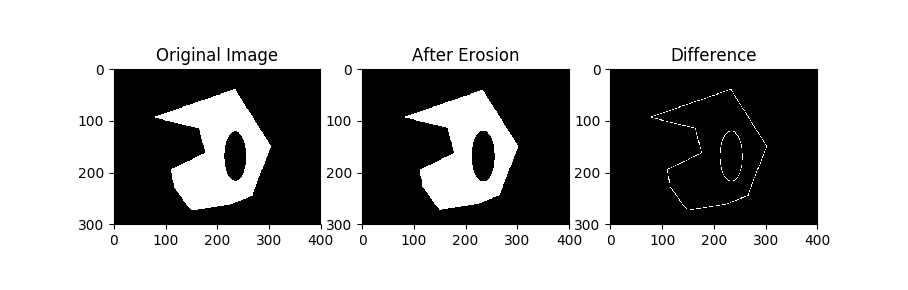

In [3]:
kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(thresh_img,kernel,iterations = 1)

plt.figure()
plt.subplot(1,3,1)
plt.title('Original Image')
imshow(thresh_img,cmap='gray')
plt.subplot(1,3,2)
plt.title('After Erosion')
imshow(erosion,cmap='gray')
plt.subplot(1,3,3)
plt.title('Difference')
imshow(thresh_img-erosion,cmap='gray')

# Dialation

$δ_B(X) = \{x|(Bˆ)x ∩ X 6∈ ∅\}$

- Filling of holes of certain shape and size, given by SE.
- Use dilation to bridge gaps of broken segments

<IPython.core.display.Javascript object>


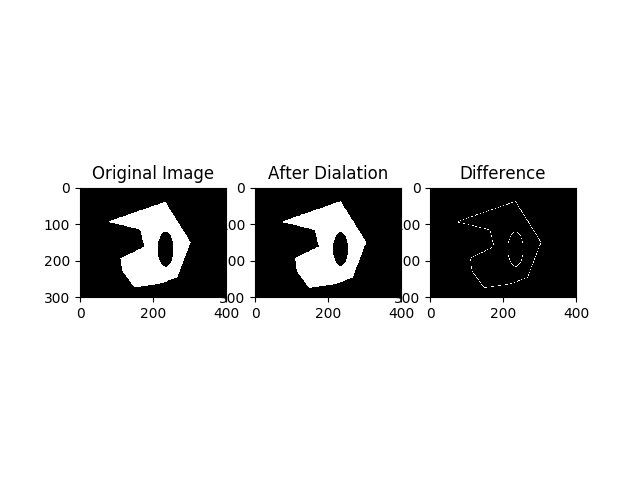

In [5]:
dilation = cv.dilate(thresh_img,kernel,iterations = 1)
plt.figure()
plt.subplot(1,3,1)
plt.title('Original Image')
imshow(thresh_img,cmap='gray')
plt.subplot(1,3,2)
plt.title('After Dialation')
imshow(dilation,cmap='gray')
plt.subplot(1,3,3)
plt.title('Difference')
imshow(thresh_img-dilation,cmap='gray')

Opening is just another name of erosion followed by dilation.

- Eliminates protrusions.
- Break necks.
- Smooths contour.

<IPython.core.display.Javascript object>


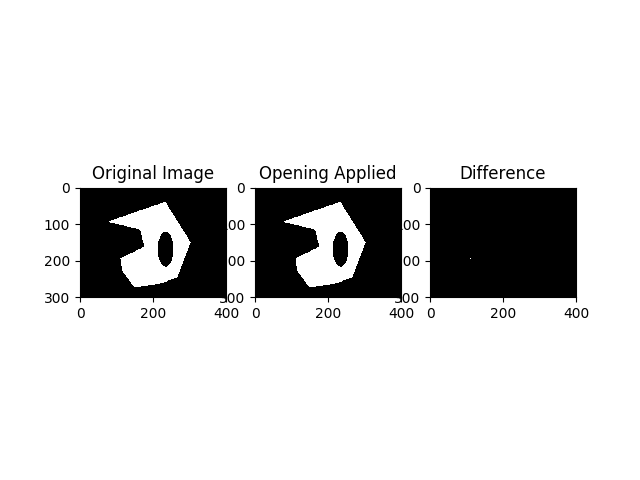

In [6]:
opening = cv.morphologyEx(thresh_img, cv.MORPH_OPEN, kernel)
plt.figure()
plt.subplot(1,3,1)
plt.title('Original Image')
imshow(thresh_img,cmap='gray')
plt.subplot(1,3,2)
plt.title('Opening Applied')
imshow(opening,cmap='gray')
plt.subplot(1,3,3)
plt.title('Difference')
imshow(thresh_img-opening,cmap='gray')

Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

- Smooth contour.
- Fuse narrow breaks and long thin gulfs.
- Eliminate small holes.
- Fill gaps in the contour.

<IPython.core.display.Javascript object>


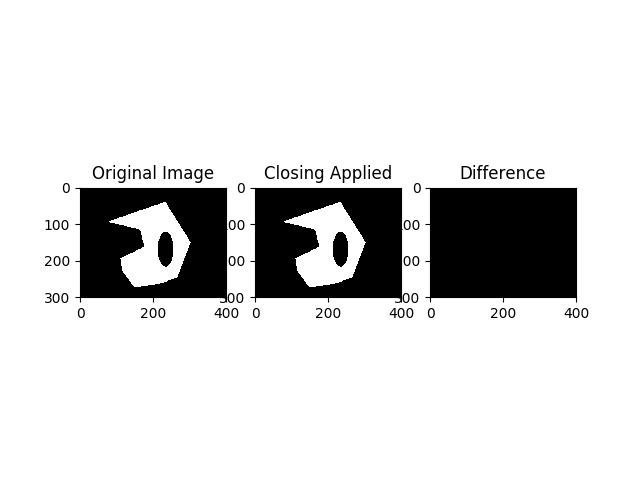

In [7]:
closing = cv.morphologyEx(thresh_img, cv.MORPH_CLOSE, kernel)
plt.figure()
plt.subplot(1,3,1)
plt.title('Original Image')
imshow(thresh_img,cmap='gray')
plt.subplot(1,3,2)
plt.title('Closing Applied')
imshow(closing,cmap='gray')
plt.subplot(1,3,3)
plt.title('Difference')
imshow(thresh_img-closing,cmap='gray')

5. Morphological Gradient
It is the difference between dilation and erosion of an image.

The result will look like the outline of the object.

<IPython.core.display.Javascript object>


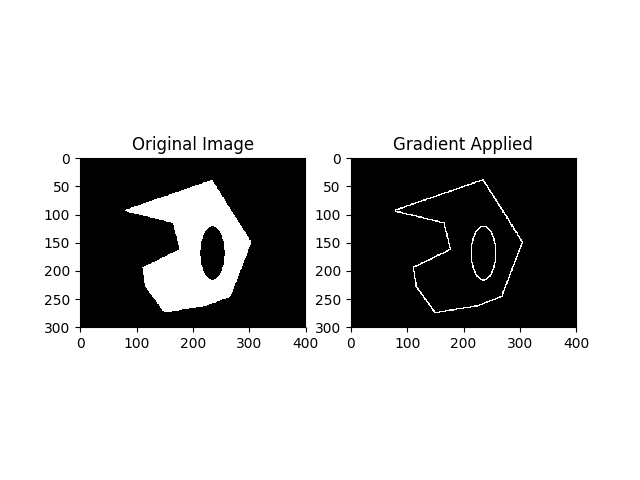

In [8]:
gradient = cv.morphologyEx(thresh_img, cv.MORPH_GRADIENT, kernel)

plt.figure()
plt.subplot(1,2,1)
plt.title('Original Image')
imshow(thresh_img,cmap='gray')
plt.subplot(1,2,2)
plt.title('Gradient Applied')
imshow(gradient,cmap='gray')

<IPython.core.display.Javascript object>


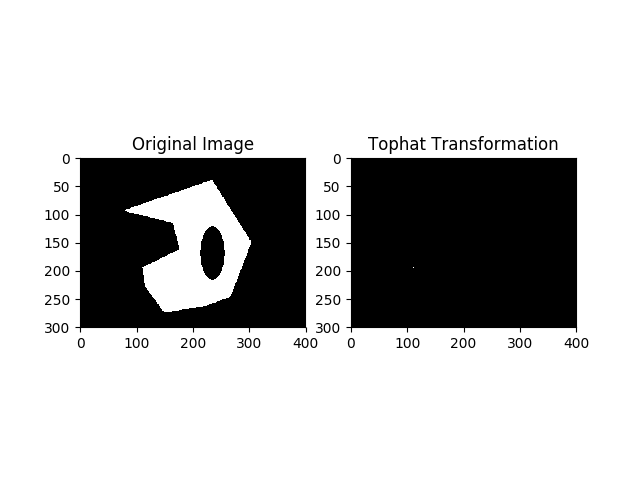

In [9]:
tophat = cv.morphologyEx(thresh_img, cv.MORPH_TOPHAT, kernel)

plt.figure()
plt.subplot(1,2,1)
plt.title('Original Image')
imshow(thresh_img,cmap='gray')
plt.subplot(1,2,2)
plt.title('Tophat Transformation')
imshow(tophat,cmap='gray')

<IPython.core.display.Javascript object>


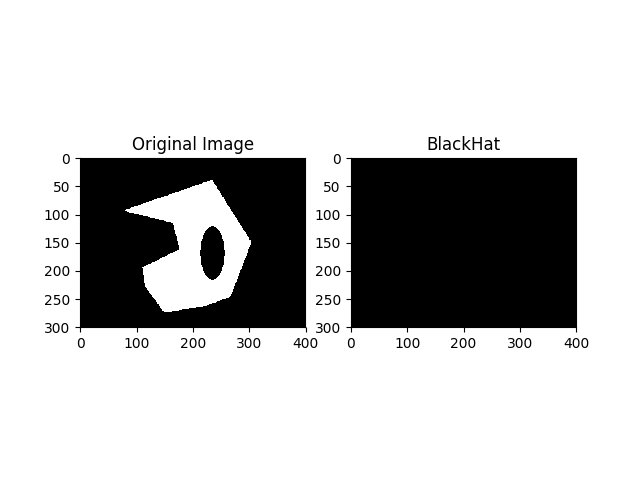

In [10]:
blackhat = cv.morphologyEx(thresh_img, cv.MORPH_BLACKHAT, kernel)

plt.figure()
plt.subplot(1,2,1)
plt.title('Original Image')
imshow(thresh_img,cmap='gray')
plt.subplot(1,2,2)
plt.title('BlackHat')
imshow(blackhat,cmap='gray')

# Hit-Or-Miss Transformation HMT

it finds those pixels whose neighbourhood matches the shape of a first structuring element B1 while not matching the shape of a second structuring element B2 at the same time.

Therefore, the hit-or-miss operation comprises three steps:

- Erode image A with structuring element B1.
- Erode the complement of image A ( $A^c$) with structuring element B2.
- AND results from step 1 and step 2.

In [10]:
import cv2 as cv
import numpy as np
input_image = np.array((
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0, 0, 255],
    [0, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 255, 0, 0],
    [0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0, 255, 255, 0],
    [0,255, 0, 255, 0, 0, 255, 0],
    [0, 255, 255, 255, 0, 0, 0, 0]), dtype="uint8")
kernel = np.array((
        [0, 1, 0],
        [1, 2, 1],
        [0, 1, 0]), dtype="int")
output_image = cv.morphologyEx(input_image, cv.MORPH_HITMISS, kernel)

# Filling boundaries

<IPython.core.display.Javascript object>


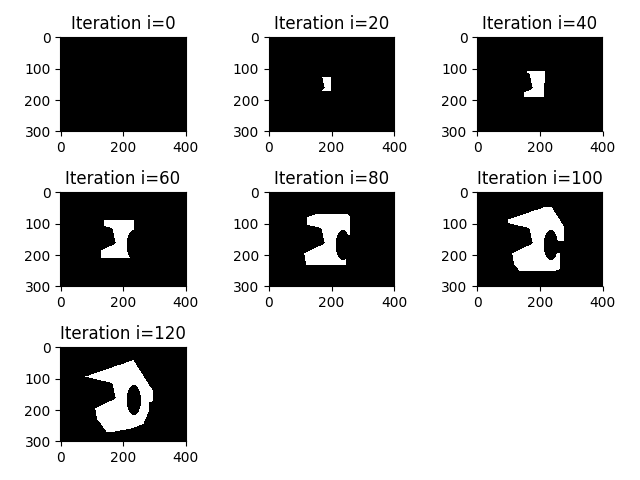

<IPython.core.display.Javascript object>


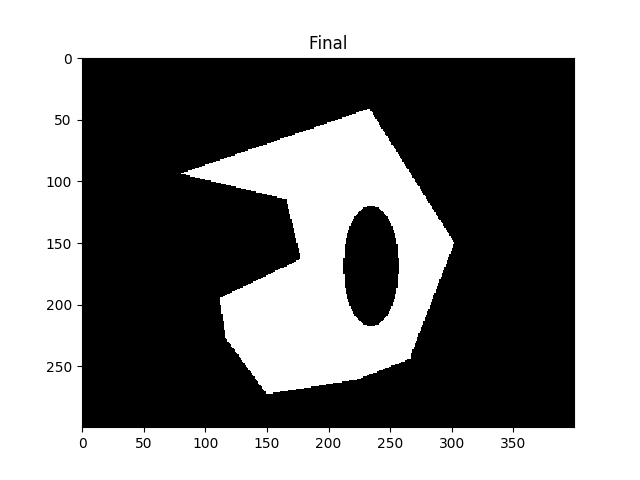

In [11]:
#np.
kernel=np.ones((3,3))
x=np.zeros_like(gradient)
x[150,174]=1
gradient_c=255-gradient


plt.figure()
for i in range(200):
    xprev=np.copy(x)
    x = np.bitwise_and(cv.dilate(x,kernel,iterations = 1),gradient_c)
    if np.sum(x!=xprev)==0:
        break
    if i%20==0:
        plt.subplot(3,3,i/20+1)
        plt.title('Iteration i={}'.format(i))
        imshow(x,cmap='gray')
plt.tight_layout()

plt.figure()
plt.title('Final')
imshow(x,cmap='gray')

# Remove connections between objects

<IPython.core.display.Javascript object>


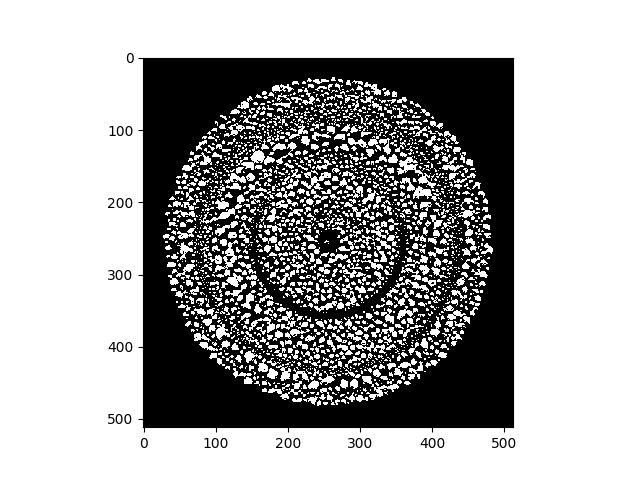

In [12]:
img = cv.imread('./data/stones.jpg',0)
thresh_img=np.zeros_like(img)
thresh_img[img<135]=0
thresh_img[img>=135]=255
plt.figure()
imshow(thresh_img,cmap='gray')

<IPython.core.display.Javascript object>


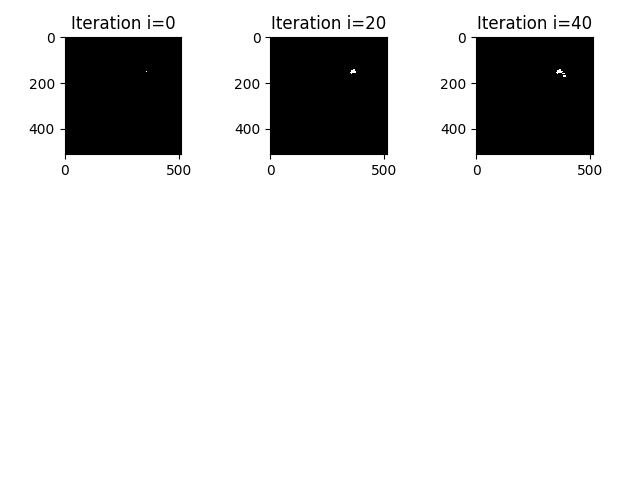

<IPython.core.display.Javascript object>


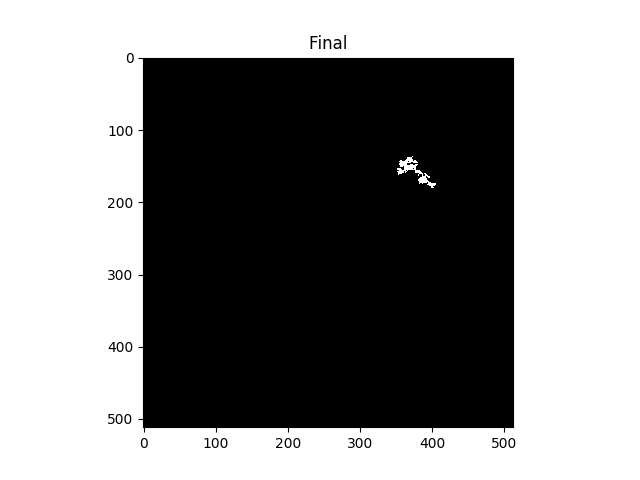

In [13]:
#150 356
#np.
kernel=np.ones((3,3))
x=np.zeros_like(thresh_img)
x[150,356]=1
gradient_c=255-gradient


plt.figure()
for i in range(200):
    xprev=np.copy(x)
    x = np.bitwise_and(cv.dilate(x,kernel,iterations = 1),thresh_img)
    if np.sum(x!=xprev)==0:
        break
    if i%20==0:
        res=np.bitwise_and(x,thresh_img)
        plt.subplot(3,3,i/20+1)
        plt.title('Iteration i={}'.format(i))
        imshow(res,cmap='gray')
plt.tight_layout()

res=np.bitwise_and(x,thresh_img)
plt.figure()
plt.title('Final')
imshow(res,cmap='gray')

### Basic Morphological Algorithms

Use erosion, dilation, opening, closing, hit-or-miss transform for
- Boundary extraction.
- Region filling.
- Extraction of connected components (labeling).
- Defining the convex hull.
- Defining the skeleton.

# Convex Hull

- Region R is convex if
    - For any points x1, x2 ∈ R, straight line between x1 and x2 is in R.
- Convex hull H of a region R
    - Smallest convex set containing R.
- Convex deficiency D = H − R.

Algorithm for computing the convex hull CH(A):
$X^{i}_k = (X_{k−1} ⊗ B_i) ∪ A, i = 1, 2, 3, 4, k = 1, 2, 3, ...$

$X^i_0 = A$

Converges to $D^i(X_k = X_{k−1})$.